A shapelet transform for time series classification (KDD 2012)
https://www.youtube.com/watch?v=RBSz2QkECaA

It also shows how we can write a better report

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
df = pd.read_csv('datatraining1.csv')
df.head()

,"""Number""","""date""","""Temperature""","""Humidity""","""Light""","""CO2""","""HumidityRatio""","""Occupancy"""
0,"""1""","""2015-02-04 17:51:00""",23.18,27.2720,426.0,721.25,0.004793,1
1,"""2""","""2015-02-04 17:51:59""",23.15,27.2675,429.5,714.00,0.004783,1
2,"""3""","""2015-02-04 17:53:00""",23.15,27.2450,426.0,713.50,0.004779,1
3,"""4""","""2015-02-04 17:54:00""",23.15,27.2000,426.0,708.25,0.004772,1
4,"""5""","""2015-02-04 17:55:00""",23.10,27.2000,426.0,704.50,0.004757,1


# shapelet discovery

In [7]:
df1.shape

(8143, 7)

# shapelet discovery

In [39]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict
import tensorflow as tf

from tslearn.preprocessing import TimeSeriesScalerMinMax

Using TensorFlow backend.
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [280]:
df1=df1.drop(columns=['"date"'])


In [44]:
df1=df1.drop(columns=['"HumidityRatio"'])
df1=df1.drop(columns=['"Humidity"'])
df1=df1.drop(columns=['"Temperature"'])


KeyError: '[\'"Temperature"\'] not found in axis'

In [47]:
df1=df1.drop(columns=['"Number"'])

In [48]:
df1

,"""Light""","""CO2""","""Occupancy"""
"""date""",,,
"""2015-02-04 17:51:00""",426.0,721.250000,1
"""2015-02-04 17:51:59""",429.5,714.000000,1
"""2015-02-04 17:53:00""",426.0,713.500000,1
"""2015-02-04 17:54:00""",426.0,708.250000,1
"""2015-02-04 17:55:00""",426.0,704.500000,1
...,...,...,...
"""2015-02-10 09:29:00""",433.0,787.250000,1
"""2015-02-10 09:29:59""",433.0,789.500000,1
"""2015-02-10 09:30:59""",433.0,798.500000,1


In [17]:
df1 = df1.iloc[0:368]
df1 = df1.iloc[1809:8143]

In [19]:
len(df1)

0

In [307]:
a=np.asarray(df1['"Light"'])
b=np.asarray(df1['"CO2"'])
c=np.asarray(df1['"Occupancy"'])

In [40]:
df1=df.set_index('"date"', inplace=True)
    

In [282]:
arrX = X.to_numpy()
arry= y.to_numpy()

In [281]:
class_name='"Occupancy"'
attributes = [col for col in df1.columns if col != class_name]
X = df1[attributes]
y = df1[class_name]

#X,y = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)



In [52]:
attributes

['"Light"', '"CO2"']

In [53]:
arrX.shape

(8143, 2)

In [156]:
arrX.reshape(-1,1)
arry.reshape(-1,1)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [143]:
print(arrX)
print(arry)

[[426.         721.25      ]
 [429.5        714.        ]
 [426.         713.5       ]
 ...
 [433.         798.5       ]
 [433.         820.33333333]
 [447.         821.        ]]
[1 1 1 ... 1 1 1]


In [204]:

n_ts,ts_sz= arrX.shape
n_classes = len(set(arry))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 8143
ts_sz 2
n_classes 2
shapelet_sizes {1: 4}


In [348]:

shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="adamax",
                        weight_regularizer=0.01,
                        max_iter=1000,
                        verbose=1)

In [349]:
shp_clf.fit(arrX,arry)

Epoch 1/1000
8143/8143 [==============================] - 1s 108us/step - loss: 489508.6923 - binary_accuracy: 0.2123 - binary_crossentropy: 489508.6562
Epoch 2/1000
8143/8143 [==============================] - 0s 12us/step - loss: 412074.2283 - binary_accuracy: 0.2123 - binary_crossentropy: 412074.2812
Epoch 3/1000
8143/8143 [==============================] - 0s 12us/step - loss: 333362.3914 - binary_accuracy: 0.2123 - binary_crossentropy: 333362.4062
Epoch 4/1000
8143/8143 [==============================] - 0s 12us/step - loss: 253088.4441 - binary_accuracy: 0.2140 - binary_crossentropy: 253088.4219
Epoch 5/1000
8143/8143 [==============================] - 0s 13us/step - loss: 174403.9645 - binary_accuracy: 0.2265 - binary_crossentropy: 174403.9688
Epoch 6/1000
8143/8143 [==============================] - 0s 12us/step - loss: 96966.9938 - binary_accuracy: 0.2117 - binary_crossentropy: 96966.9922
Epoch 7/1000
8143/8143 [==============================] - 0s 12us/step - loss: 27501.9831

8143/8143 [==============================] - 0s 10us/step - loss: 2.8126 - binary_accuracy: 0.9546 - binary_crossentropy: 2.7594
Epoch 112/1000
8143/8143 [==============================] - 0s 10us/step - loss: 2.8242 - binary_accuracy: 0.9509 - binary_crossentropy: 2.7711
Epoch 113/1000
8143/8143 [==============================] - 0s 10us/step - loss: 3.5916 - binary_accuracy: 0.9456 - binary_crossentropy: 3.5386
Epoch 114/1000
8143/8143 [==============================] - 0s 11us/step - loss: 3.2790 - binary_accuracy: 0.9531 - binary_crossentropy: 3.2261
Epoch 115/1000
8143/8143 [==============================] - 0s 10us/step - loss: 3.0093 - binary_accuracy: 0.9521 - binary_crossentropy: 2.9566
Epoch 116/1000
8143/8143 [==============================] - 0s 10us/step - loss: 2.6870 - binary_accuracy: 0.9542 - binary_crossentropy: 2.6343
Epoch 117/1000
8143/8143 [==============================] - 0s 10us/step - loss: 2.5808 - binary_accuracy: 0.9492 - binary_crossentropy: 2.5282
Epoch 1

8143/8143 [==============================] - 0s 11us/step - loss: 18.3509 - binary_accuracy: 0.8422 - binary_crossentropy: 18.3064
Epoch 224/1000
8143/8143 [==============================] - 0s 11us/step - loss: 10.0569 - binary_accuracy: 0.8836 - binary_crossentropy: 10.0121
Epoch 225/1000
8143/8143 [==============================] - 0s 13us/step - loss: 2.9102 - binary_accuracy: 0.9566 - binary_crossentropy: 2.8653
Epoch 226/1000
8143/8143 [==============================] - 0s 22us/step - loss: 2.5547 - binary_accuracy: 0.9539 - binary_crossentropy: 2.5099
Epoch 227/1000
8143/8143 [==============================] - 0s 26us/step - loss: 2.4237 - binary_accuracy: 0.9532 - binary_crossentropy: 2.3790
Epoch 228/1000
8143/8143 [==============================] - 0s 23us/step - loss: 2.5972 - binary_accuracy: 0.9487 - binary_crossentropy: 2.5526
Epoch 229/1000
8143/8143 [==============================] - 0s 18us/step - loss: 2.4731 - binary_accuracy: 0.9508 - binary_crossentropy: 2.4285
Epo

8143/8143 [==============================] - 0s 23us/step - loss: 2.8376 - binary_accuracy: 0.9496 - binary_crossentropy: 2.7989
Epoch 336/1000
8143/8143 [==============================] - 0s 22us/step - loss: 2.3179 - binary_accuracy: 0.9543 - binary_crossentropy: 2.2793
Epoch 337/1000
8143/8143 [==============================] - 0s 19us/step - loss: 2.6829 - binary_accuracy: 0.9472 - binary_crossentropy: 2.6444
Epoch 338/1000
8143/8143 [==============================] - 0s 17us/step - loss: 12.3486 - binary_accuracy: 0.8837 - binary_crossentropy: 12.3101
Epoch 339/1000
8143/8143 [==============================] - 0s 29us/step - loss: 19.5981 - binary_accuracy: 0.8416 - binary_crossentropy: 19.5594
Epoch 340/1000
8143/8143 [==============================] - 0s 17us/step - loss: 13.8075 - binary_accuracy: 0.8545 - binary_crossentropy: 13.7686
Epoch 341/1000
8143/8143 [==============================] - 0s 18us/step - loss: 3.8183 - binary_accuracy: 0.9473 - binary_crossentropy: 3.7792
E

8143/8143 [==============================] - 0s 16us/step - loss: 19.7002 - binary_accuracy: 0.8494 - binary_crossentropy: 19.6655
Epoch 448/1000
8143/8143 [==============================] - 0s 13us/step - loss: 9.8372 - binary_accuracy: 0.8865 - binary_crossentropy: 9.8022
Epoch 449/1000
8143/8143 [==============================] - 0s 15us/step - loss: 3.0190 - binary_accuracy: 0.9484 - binary_crossentropy: 2.9839
Epoch 450/1000
8143/8143 [==============================] - 0s 16us/step - loss: 2.1682 - binary_accuracy: 0.9544 - binary_crossentropy: 2.1332
Epoch 451/1000
8143/8143 [==============================] - 0s 15us/step - loss: 2.1807 - binary_accuracy: 0.9544 - binary_crossentropy: 2.1457
Epoch 452/1000
8143/8143 [==============================] - 0s 16us/step - loss: 2.2072 - binary_accuracy: 0.9512 - binary_crossentropy: 2.1723
Epoch 453/1000
8143/8143 [==============================] - 0s 15us/step - loss: 2.1321 - binary_accuracy: 0.9500 - binary_crossentropy: 2.0973
Epoch

8143/8143 [==============================] - 0s 18us/step - loss: 2.0907 - binary_accuracy: 0.9521 - binary_crossentropy: 2.0598
Epoch 560/1000
8143/8143 [==============================] - 0s 16us/step - loss: 2.3621 - binary_accuracy: 0.9479 - binary_crossentropy: 2.3313
Epoch 561/1000
8143/8143 [==============================] - 0s 16us/step - loss: 2.3059 - binary_accuracy: 0.9509 - binary_crossentropy: 2.2751
Epoch 562/1000
8143/8143 [==============================] - 0s 17us/step - loss: 1.9533 - binary_accuracy: 0.9539 - binary_crossentropy: 1.9225
Epoch 563/1000
8143/8143 [==============================] - 0s 14us/step - loss: 1.9341 - binary_accuracy: 0.9515 - binary_crossentropy: 1.9035
Epoch 564/1000
8143/8143 [==============================] - 0s 17us/step - loss: 1.9616 - binary_accuracy: 0.9500 - binary_crossentropy: 1.9311
Epoch 565/1000
8143/8143 [==============================] - 0s 18us/step - loss: 1.9954 - binary_accuracy: 0.9510 - binary_crossentropy: 1.9649
Epoch 5

8143/8143 [==============================] - 0s 14us/step - loss: 2.0692 - binary_accuracy: 0.9506 - binary_crossentropy: 2.0400
Epoch 672/1000
8143/8143 [==============================] - 0s 12us/step - loss: 2.2218 - binary_accuracy: 0.9494 - binary_crossentropy: 2.1927
Epoch 673/1000
8143/8143 [==============================] - 0s 12us/step - loss: 3.2539 - binary_accuracy: 0.9355 - binary_crossentropy: 3.2249
Epoch 674/1000
8143/8143 [==============================] - 0s 14us/step - loss: 15.3514 - binary_accuracy: 0.8338 - binary_crossentropy: 15.3223
Epoch 675/1000
8143/8143 [==============================] - 0s 14us/step - loss: 5.3830 - binary_accuracy: 0.9159 - binary_crossentropy: 5.3537
Epoch 676/1000
8143/8143 [==============================] - 0s 13us/step - loss: 2.5758 - binary_accuracy: 0.9509 - binary_crossentropy: 2.5465
Epoch 677/1000
8143/8143 [==============================] - 0s 14us/step - loss: 2.0198 - binary_accuracy: 0.9594 - binary_crossentropy: 1.9905
Epoch

8143/8143 [==============================] - 0s 16us/step - loss: 3.0694 - binary_accuracy: 0.9433 - binary_crossentropy: 3.0427
Epoch 784/1000
8143/8143 [==============================] - 0s 16us/step - loss: 2.3550 - binary_accuracy: 0.9505 - binary_crossentropy: 2.3284
Epoch 785/1000
8143/8143 [==============================] - 0s 14us/step - loss: 2.0837 - binary_accuracy: 0.9521 - binary_crossentropy: 2.0571
Epoch 786/1000
8143/8143 [==============================] - 0s 17us/step - loss: 2.7111 - binary_accuracy: 0.9463 - binary_crossentropy: 2.6846
Epoch 787/1000
8143/8143 [==============================] - 0s 13us/step - loss: 22.0955 - binary_accuracy: 0.8153 - binary_crossentropy: 22.0689
Epoch 788/1000
8143/8143 [==============================] - 0s 13us/step - loss: 15.6389 - binary_accuracy: 0.8458 - binary_crossentropy: 15.6121
Epoch 789/1000
8143/8143 [==============================] - 0s 15us/step - loss: 3.5519 - binary_accuracy: 0.9393 - binary_crossentropy: 3.5249
Epo

8143/8143 [==============================] - 0s 16us/step - loss: 23.3864 - binary_accuracy: 0.8092 - binary_crossentropy: 23.3621
Epoch 896/1000
8143/8143 [==============================] - 0s 14us/step - loss: 23.7267 - binary_accuracy: 0.8127 - binary_crossentropy: 23.7020
Epoch 897/1000
8143/8143 [==============================] - 0s 13us/step - loss: 20.0932 - binary_accuracy: 0.8046 - binary_crossentropy: 20.0681
Epoch 898/1000
8143/8143 [==============================] - 0s 12us/step - loss: 8.0134 - binary_accuracy: 0.9073 - binary_crossentropy: 7.9881
Epoch 899/1000
8143/8143 [==============================] - 0s 17us/step - loss: 1.9350 - binary_accuracy: 0.9499 - binary_crossentropy: 1.9097
Epoch 900/1000
8143/8143 [==============================] - 0s 12us/step - loss: 1.7904 - binary_accuracy: 0.9524 - binary_crossentropy: 1.7651
Epoch 901/1000
8143/8143 [==============================] - 0s 14us/step - loss: 1.7830 - binary_accuracy: 0.9530 - binary_crossentropy: 1.7577
E

ShapeletModel(batch_size=256, max_iter=1000, n_shapelets_per_size={1: 4},
              optimizer='adamax', random_state=None, shapelet_length=0.15,
              total_lengths=3, verbose=1, verbose_level=None,
              weight_regularizer=0.01)

In [353]:
from sklearn.metrics import accuracy_score

In [354]:
predicted_labels = shp_clf.predict(arrX)
print("Correct classification rate:", accuracy_score(arry, predicted_labels))

8143/8143 [==============================] - 0s 6us/step
Correct classification rate: 0.9463342748372836


In [355]:
predicted_locations = shp_clf.locate(arrX)

//anaconda3/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 8143 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


8143/8143 [==============================] - 1s 115us/step


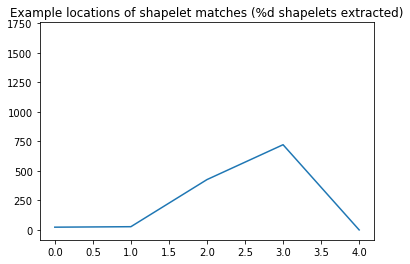

In [356]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(arrX[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

# Shapelet Discovery 2

In [283]:
from shapelets_lts.classification import LtsShapeletClassifier

In [293]:
shp_clf = LtsShapeletClassifier(
    K=10,
    R=2,
    L_min=1,
    epocs=50,
    lamda=1,
    eta=0.01,
    shapelet_initialization='segments_centroids',
    plot_loss=False
)


In [294]:
arry.shape

(8143,)

In [295]:
shp_clf.fit(arrX, arry)

Network initialization ...
Using training data to initialize shaplets
Training ...
Using training data for validation


//anaconda3/lib/python3.7/site-packages/shapelets_lts/network/soft_min_layer.py:67: RuntimeWarning: invalid value encountered in double_scalars
  M = M_numerator / self.psi


epoch=1/50 (iteration=8143) loss=nan validation accuracy=0.7876703917475132
epoch=2/50 (iteration=16286) loss=nan validation accuracy=0.7876703917475132
epoch=3/50 (iteration=24429) loss=nan validation accuracy=0.7876703917475132
epoch=4/50 (iteration=32572) loss=nan validation accuracy=0.7876703917475132
epoch=5/50 (iteration=40715) loss=nan validation accuracy=0.7876703917475132


KeyboardInterrupt: 

In [350]:
from sklearn.metrics import accuracy_score

In [351]:
y_pred = shp_clf.predict(arrX)

print("Correct classification rate:", accuracy_score(arry, y_pred))

8143/8143 [==============================] - 1s 110us/step
Correct classification rate: 0.9463342748372836


In [352]:
# retrieve the learnt shapelets
shapelets = shp_clf.get_shapelets()

# and plot sample shapelets
from shapelets_lts.util import plot_sample_shapelets
plot_sample_shapelets(shapelets=shapelets, sample_size=36)

AttributeError: 'ShapeletModel' object has no attribute 'get_shapelets'

In [122]:
len(shapelets)

10

# Shapelet Discovery 3

In [345]:
from pyts.transformation import ShapeletTransform

In [347]:
st = ShapeletTransform(n_shapelets=2, window_sizes=[5])
st.fit(arrX, arry)

KeyboardInterrupt: 

In [ ]:
len(st.shapelets_)

In [ ]:
st.shapelets_

In [ ]:
for s in st.shapelets_:
    plt.plot(s)

plt.show()

In [ ]:
st.indices_

In [ ]:
st.scores_

# Shapelet Discovery 4

In [338]:
from pyts.classification import LearningShapelets

In [339]:
shp_clf = LearningShapelets(random_state=42, tol=0.1)

In [340]:
shp_clf.fit(arrX, arry)

LearningShapelets(C=1000, alpha=-100, class_weight=None, fit_intercept=True,
                  intercept_scaling=1.0, learning_rate=1.0, max_iter=1000,
                  min_shapelet_length=0.1, multi_class='multinomial',
                  n_jobs=None, n_shapelets_per_size=0.2, penalty='l2',
                  random_state=42, shapelet_scale=3, tol=0.1, verbose=0)

In [341]:
len(shp_clf.shapelets_[0])

3

In [342]:
from pyts.utils import windowed_view

In [343]:
# Select three shapelets
sel_shapelets = np.asarray([shp_clf.shapelets_[0, 0], 
                        shp_clf.shapelets_[0, 1], 
                        shp_clf.shapelets_[0, 2]])

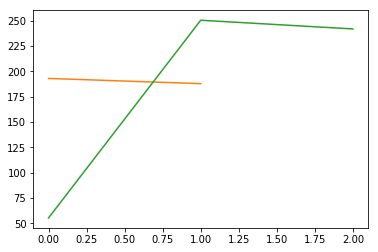

In [344]:
plt.plot(sel_shapelets[0])
plt.plot(sel_shapelets[1])
plt.plot(sel_shapelets[2])

plt.show()

In [329]:
# Derive the distances between the time series and a shapelets
shapelet_size = sel_shapelets.shape[0]
X_window = windowed_view(arrX, window_size=shapelet_size, window_step=1)
X_dist = np.mean((X_window[:, :, None] - sel_shapelets[None, :]) ** 1, axis=1).min(axis=1)

In [330]:
X_dist

array([[array([4.3333193]), array([198.4032816 , 203.55708683]),
        array([327.12827581, 131.81922267, 140.39510418])],
       [array([5.48848597]), array([197.1517816 , 202.30558683]),
        array([325.87827263, 130.56921949, 139.14510099])],
       [array([4.3143193]), array([195.81094827, 200.9647535 ]),
        array([324.54493797, 129.23588483, 137.81176634])],
       ...,
       [array([8.9143193]), array([229.42761494, 234.58142016]),
        array([355.21187669, 159.90282355, 168.47870506])],
       [array([8.9693193]), array([236.76039271, 241.91419794]),
        array([362.48966307, 167.18060993, 175.75649144])],
       [array([13.61598597]), array([241.6292816 , 246.78308683]),
        array([367.37854883, 172.06949569, 180.6453772 ])]], dtype=object)

In [331]:
np.mean(X_dist[y == 0], axis=0)

array([array([-129.99699459]), array([-11.95523861,  -6.80143339]),
       array([117.41017285, -77.89888028, -69.32299878])], dtype=object)

In [332]:
np.mean(X_dist[y == 1], axis=0)

array([array([15.07447843]), array([315.13163881, 320.28544404]),
       array([443.89784109, 248.58878795, 257.16466946])], dtype=object)